In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set()

def ans(q, an):
    print(f"The answer for Q{q} is: {an}")

In [7]:
df = pd.read_csv('***')
df.set_index("ID", inplace=True)

In [8]:
df.sample(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
848191936,Halley Helmet Rack The place your motorcycle h...,Product Design,Design,EUR,2017-12-22,2000.0,2017-11-21 17:22:12,13802.0,successful,95,ES,2962.71,16359.48,2370.60
1282481409,Journey From Tree To Kazoo - An American Folk ...,Documentary,Film & Video,USD,2012-02-08,3000.0,2012-01-09 21:35:54,200.0,failed,5,US,200.00,200.00,3000.00
1315252235,Life In Afghanistan Board Game,Tabletop Games,Games,CAD,2016-09-21,4500.0,2016-08-22 21:45:24,0.0,canceled,0,CA,0.00,0.00,3450.39
654828971,Multibru - a versatile manual brewer for both ...,Product Design,Design,USD,2014-09-23,35000.0,2014-08-20 21:43:47,11060.0,failed,98,US,11060.00,11060.00,35000.00
2012933132,Greg Hastings' Tournament Paintball Max'd 2,Video Games,Games,USD,2013-01-19,643000.0,2012-11-20 18:01:19,1553.0,failed,65,US,1553.00,1553.00,643000.00


In [9]:
df.shape

(378661, 14)

In [10]:
df.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              378657 non-null  object 
 1   category          378661 non-null  object 
 2   main_category     378661 non-null  object 
 3   currency          378661 non-null  object 
 4   deadline          378661 non-null  object 
 5   goal              378661 non-null  float64
 6   launched          378661 non-null  object 
 7   pledged           378661 non-null  float64
 8   state             378661 non-null  object 
 9   backers           378661 non-null  int64  
 10  country           378661 non-null  object 
 11  usd pledged       374864 non-null  float64
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


In [12]:
ans(1.1, df.isna().sum().sum())
df.dropna(inplace=True)

The answer for Q1.1 is: 3801


In [13]:
df = df.drop(df[df.state.isin(["undefined", "live", "suspended"])].index)
df['state'] = df.state.apply(lambda x: 1 if x == "successful" else 0)
ans(1.2, len(df[df.state == 1]))

The answer for Q1.2 is: 133851


In [14]:
explore_df = df.copy()
explore_df['avg_paycheck'] = explore_df.apply(lambda row: row['usd_pledged_real'] / row['backers'] if row['backers'] else 0, axis=1)

In [15]:
ans(1.3, explore_df[explore_df.avg_paycheck == explore_df.avg_paycheck.max()].iloc[0]['name'])

The answer for Q1.3 is: Patented (9 seasons) food enhancer


In [16]:
ans(1.4, explore_df.groupby('category')['state'].mean().idxmax())

The answer for Q1.4 is: Chiptune


In [17]:
explore_df.groupby('category')['goal'].mean().idxmax()

ans(1.5, 1)

The answer for Q1.5 is: 1


In [18]:
ans(1.6, explore_df.groupby('category')['usd_pledged_real'].sum().idxmax())

The answer for Q1.6 is: Product Design


In [19]:
object_type_features_list = list(explore_df.dtypes[explore_df.dtypes == "object"].index)
numeric_features_list = list(explore_df.dtypes[~explore_df.dtypes.index.isin(object_type_features_list)].index)

ans(1.7, len(object_type_features_list))

The answer for Q1.7 is: 7


In [20]:
explore_df['pledge2goal'] = explore_df.usd_pledged_real / explore_df.goal

q25 = explore_df.pledge2goal.quantile(q=0.25)
q75 = explore_df.pledge2goal.quantile(q=0.75)
iqr = q75 - q25

outliers = explore_df[(explore_df.pledge2goal < (q25 - iqr)) | (explore_df.pledge2goal > (q75 + iqr))]
ans(1.8, len(outliers))
explore_df = explore_df[(explore_df.pledge2goal >(q25 - iqr)) & (explore_df.pledge2goal < (q75 + iqr))]

The answer for Q1.8 is: 24502


The answer for Q1.9 is: B


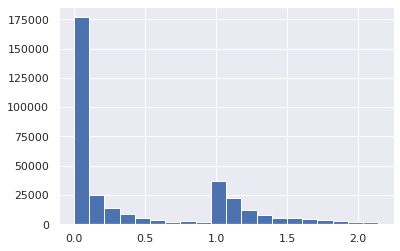

In [21]:
explore_df.pledge2goal.hist(bins=20) 

ans(1.9, "B")

In [22]:
ans(1.10, [explore_df.pledge2goal.value_counts().sort_values().idxmax(), explore_df.pledge2goal.value_counts().sort_values().iloc[:-1].idxmax()])

The answer for Q1.1 is: [0.0, 1.0]


In [23]:
ans(1.11, explore_df[['state', 'pledge2goal']].corr(method="pearson").iloc[0]['pledge2goal'])

The answer for Q1.11 is: 0.9210640126284639


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


The answer for Q1.12 is: pledge_2_goal and avg_paycheck seem pretty disconnected from other features, given success


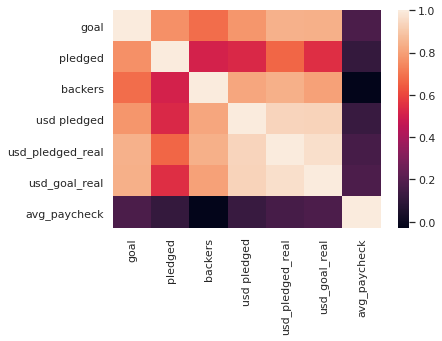

In [24]:
numeric_features = explore_df[numeric_features_list]
numeric_successful = numeric_features[numeric_features['state'] == 1]
numeric_successful.drop(columns=['state'], inplace=True)

sns.heatmap(numeric_successful.corr());

ans(1.12, "pledge_2_goal and avg_paycheck seem pretty disconnected from other features, given success")

In [25]:
df['year_launched'] = pd.to_datetime(df.launched).apply(lambda date: date.year)

ans(2.1, len(df[df['year_launched'] == 2012]))

The answer for Q2.1 is: 41109


In [26]:
df['launched'] = pd.to_datetime(explore_df.launched).apply(lambda date: date.date())
df['deadline'] = pd.to_datetime(explore_df.deadline).apply(lambda date: date.date())
df['duration_days'] = (df['deadline'] - df['launched']).apply(lambda days: days.days)
df.dropna(inplace=True)

In [27]:
ans(2.2, df['duration_days'].median())

The answer for Q2.2 is: 30.0


In [29]:
def find_region(country):
    if country in ["US", "CA", "MX"]:
        return "america"
    elif country in ["SG", "JP", "HK"]:
        return "asia"
    elif country in ["AU", "NZ"]:
        return "oceania"
    else:
        return "europe"

df['region'] = df['country'].apply(find_region)

worst_conversion_rate_region = df.groupby('region')['state'].mean().idxmin()

ans(2.4, worst_conversion_rate_region)

The answer for Q2.4 is: oceania


In [30]:
import tqdm
category_frame = df.groupby(['main_category'])['category'].value_counts().to_frame().rename(columns={'category': 'category_count'}).reset_index()
largest = category_frame.groupby(['main_category'])['category', 'category_count'].apply(pd.DataFrame.nlargest, n=3, columns=['category_count']).reset_index().drop(columns={'level_1'})

category_dict = largest[['main_category', 'category']].groupby(['main_category'])['category'].apply(list).to_dict()

concat_frames = []
for key, category_list in tqdm.tqdm(category_dict.items()):
  current_frame = df[df['main_category'] == key]

  popular_frame = current_frame[current_frame['category'].isin(category_list)]
  other_frame = current_frame[~current_frame['category'].isin(category_list)]

  number_other = other_frame.shape[0]
  other_frame['category'] =  np.repeat(['Other'], repeats=number_other) 

  frame = pd.concat([popular_frame, other_frame])
  concat_frames.append(frame)

df = pd.concat(concat_frames)

ans(2.5, df[df['main_category'] == 'Design']['category'].mode()[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
  0%|          | 0/15 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
100%|██████████| 15/15 [00:00<00:00, 24.21it/s]


The answer for Q2.5 is: Product Design


In [31]:
df['name_length'] = df['name'].apply(lambda name: len(name))
ans(2.6, df.name_length.max())

The answer for Q2.6 is: 96


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345717 entries, 1000120287 to 998134859
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              345717 non-null  object 
 1   category          345717 non-null  object 
 2   main_category     345717 non-null  object 
 3   currency          345717 non-null  object 
 4   deadline          345717 non-null  object 
 5   goal              345717 non-null  float64
 6   launched          345717 non-null  object 
 7   pledged           345717 non-null  float64
 8   state             345717 non-null  int64  
 9   backers           345717 non-null  int64  
 10  country           345717 non-null  object 
 11  usd pledged       345717 non-null  float64
 12  usd_pledged_real  345717 non-null  float64
 13  usd_goal_real     345717 non-null  float64
 14  year_launched     345717 non-null  int64  
 15  duration_days     345717 non-null  float64
 16  region  

In [33]:
df = df.drop(columns=['pledged', 'backers', 'usd pledged', 'usd_pledged_real'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345717 entries, 1000120287 to 998134859
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   name           345717 non-null  object 
 1   category       345717 non-null  object 
 2   main_category  345717 non-null  object 
 3   currency       345717 non-null  object 
 4   deadline       345717 non-null  object 
 5   goal           345717 non-null  float64
 6   launched       345717 non-null  object 
 7   state          345717 non-null  int64  
 8   country        345717 non-null  object 
 9   usd_goal_real  345717 non-null  float64
 10  year_launched  345717 non-null  int64  
 11  duration_days  345717 non-null  float64
 12  region         345717 non-null  object 
 13  name_length    345717 non-null  int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 39.6+ MB


In [35]:
df.drop(columns=['name', 'deadline', 'launched', 'country', 'usd_goal_real']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345717 entries, 1000120287 to 998134859
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   category       345717 non-null  object 
 1   main_category  345717 non-null  object 
 2   currency       345717 non-null  object 
 3   goal           345717 non-null  float64
 4   state          345717 non-null  int64  
 5   year_launched  345717 non-null  int64  
 6   duration_days  345717 non-null  float64
 7   region         345717 non-null  object 
 8   name_length    345717 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 26.4+ MB


In [36]:
dropped_cat_features = df[['name', 'deadline', 'launched', 'country', 'usd_goal_real']]

df.drop(columns=['name', 'deadline', 'launched', 'country', 'usd_goal_real'], inplace=True)

In [37]:
df = df.join(pd.get_dummies(df.category, prefix='category'))
df = df.join(pd.get_dummies(df.main_category, prefix='main_category'))
df = df.join(pd.get_dummies(df.currency, prefix='currency'))
df = df.join(pd.get_dummies(df.region, prefix='region'))

In [38]:
df.drop(columns=['category', 'main_category', 'currency', 'region'], inplace=True)

In [39]:
ans(3.4, len(df.columns))

The answer for Q3.4 is: 83


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['state']), df['state'], test_size=0.2, random_state=42)

In [41]:
ans(3.3, y_test.value_counts()[1])

The answer for Q3.3 is: 22231


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train.values)
scaled_X_test = scaler.transform(X_test.values)

scaled_X_train = pd.DataFrame(scaled_X_train, index=X_train.index, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, index=X_test.index, columns=X_test.columns)

In [43]:
X_train = scaled_X_train
X_test = scaled_X_test

In [44]:
ans(3.4, max([X_test.goal.max(), X_train.goal.max()]))

The answer for Q3.4 is: 84.83303404858398


In [45]:
from sklearn.feature_selection import f_classif, SelectKBest

selector = SelectKBest(f_classif, k=2)
selector.fit(X_train, y_train)
cols = selector.get_support()
two_best = []
for index, column in enumerate(cols):
    if column:
        two_best.append(X_train.columns[index])

In [46]:
ans(4.3, two_best)

The answer for Q4.3 is: ['main_category_Music', 'main_category_Technology']


------

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_parameters = {'C': np.logspace(-2, 4, 7)}

logistic_clf = LogisticRegression()
logistic_clf = logistic_clf.fit(X_train, y_train)

logistic_clf = GridSearchCV(logistic_clf, logistic_parameters, n_jobs = -1, verbose=1)
logistic_clf = logistic_clf.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  1.4min finished


In [48]:
ans(4.2, logistic_clf.best_estimator_.C)

The answer for Q4.2 is: 1000.0


In [49]:
from sklearn.metrics import accuracy_score

logistic_clf = logistic_clf.best_estimator_
logistic_clf.fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

ans(4.3, accuracy)

The answer for Q4.3 is: 0.705903621427745


In [50]:
weights_dict = dict(zip(X_train.columns, logistic_clf.coef_[0]))
weights_df = pd.DataFrame.from_dict(weights_dict, orient='index')
weights_df = weights_df.apply(lambda x: abs(x))
top_features = weights_df.sort_values(by=0, ascending=False).head(3).index
print("Top 3 features are")
for idx, feature in enumerate(top_features):
    print(f"{idx + 1}: {feature}")

Top 3 features are
1: goal
2: duration_days
3: main_category_Theater


In [51]:
from sklearn.metrics import roc_auc_score, roc_curve
probs = logistic_clf.predict_proba(X_test)
probs

array([[0.61168708, 0.38831292],
       [0.46164453, 0.53835547],
       [0.62709052, 0.37290948],
       ...,
       [0.4152598 , 0.5847402 ],
       [0.89684945, 0.10315055],
       [0.78366825, 0.21633175]])

In [52]:
probs = [prob[1] for prob in probs]

In [53]:
roc_auc = roc_auc_score(y_test, probs)

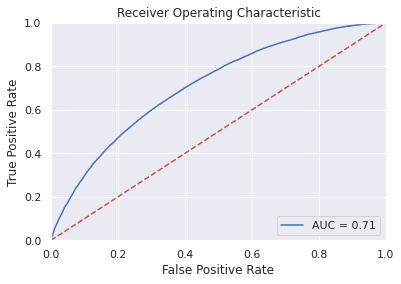

In [54]:
fpr, tpr, threshold = roc_curve(y_test, probs)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [55]:
ans(4.5, roc_auc)

The answer for Q4.5 is: 0.711607213596689


In [56]:
from sklearn.ensemble import RandomForestClassifier

forest_parameters = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': list(range(2, 15)),
    'random_state': [42]
}

rfclf = RandomForestClassifier()
rfclf = rfclf.fit(X_train, y_train)

rfclf = GridSearchCV(rfclf, forest_parameters, n_jobs = -1, verbose=1000)
rfclf = rfclf.fit(X_train, y_train)

In [57]:
import pickle
rfclf = pickle.load(open('/content/drive/My Drive/random_forest.sav', 'rb'))
#pickle.dump(rfclf, open("random_forest.sav", 'wb'))

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [58]:
ans(4.7, [rfclf.max_depth, rfclf.n_estimators])

The answer for Q4.7 is: [14, 100]


In [59]:
y_pred = rfclf.predict(X_test)
ans(4.7, accuracy_score(y_test, y_pred))

The answer for Q4.7 is: 0.7138435728335069


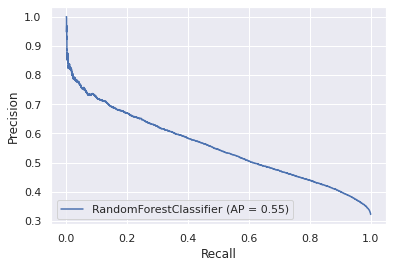

In [60]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rfclf, X_test, y_test);

In [61]:
ans(4.8, 0.54)

The answer for Q4.8 is: 0.54


In [62]:
weights_dict = dict(zip(X_train.columns, rfclf.feature_importances_))
weights_df = pd.DataFrame.from_dict(weights_dict, orient='index')
weights_df = weights_df.apply(lambda x: abs(x))
top_features = weights_df.sort_values(by=0, ascending=False).head(3).index
print("Top 3 features are")
for idx, feature in enumerate(top_features):
    print(f"{idx + 1}: {feature}")

Top 3 features are
1: goal
2: duration_days
3: year_launched


In [63]:
df['country'], df['category'] = explore_df['country'], explore_df['category'] # feature I
df['country_category'] = df.apply(lambda row: f"{row.country}_{row.category}", axis=1)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()
le.fit(list(df['country_category'].astype(str).values))

df['country_category'] = le.transform(list(df['country_category'].astype(str).values))

In [66]:
df['daily_costs'] = df.goal / df.duration_days # feature 2

In [67]:
df.drop(columns=['country', 'category', 'country_category'], inplace=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['state']), df['state'], test_size=0.2, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train.values)
scaled_X_test = scaler.transform(X_test.values)

scaled_X_train = pd.DataFrame(scaled_X_train, index=X_train.index, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, index=X_test.index, columns=X_test.columns)

In [69]:
import xgboost as xgb

In [70]:
xgb_model = xgb.XGBClassifier(three_method="gpu_hist")
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, three_method='gpu_hist', verbosity=1)

In [ ]:
parameters = {'nthread':[4],
              'objective':['binary:logistic'],
              'learning_rate': [0.1],
              'max_depth': list(range(2, 15, 2)),
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [10, 20, 50, 100, 200],
              'missing':[-999],
              'seed': [42]}

clf = GridSearchCV(xgb_model, parameters, scoring='roc_auc', verbose=1000, refit=True, n_jobs=-1)
clf.fit(X_train, y_train)

In [74]:
clf = clf.best_estimator_

In [75]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7219136873770682

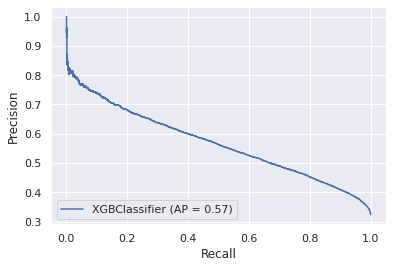

In [76]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(clf, X_test, y_test);

In [77]:
weights_dict = dict(zip(X_train.columns, clf.feature_importances_))
weights_df = pd.DataFrame.from_dict(weights_dict, orient='index')
weights_df = weights_df.apply(lambda x: abs(x))
top_features = weights_df.sort_values(by=0, ascending=False).head(3).index
print("Top 3 features are")
for idx, feature in enumerate(top_features):
    print(f"{idx + 1}: {feature}")

Top 3 features are
1: main_category_Theater
2: main_category_Dance
3: main_category_Music
